In [16]:
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt

In [31]:
# generate stock price at expiration
def gen_S_T(S0, sigma, T, n):
  dt = T / n
  u = np.exp(sigma * np.sqrt(dt)); d = 1/u
  S_T = np.zeros(n+1)
  for i in range(n+1):
    S_T[i] = S0 * (u**(n-i)) * (d**i)
  return (u, d, S_T)

In [32]:
S0 = 100; sigma = 0.20; T = 1; n = 3
gen_S_T(S0, sigma, T, n)

(1.1224009024456676,
 0.8909472522884107,
 array([141.39824581, 112.24009024,  89.09472523,  70.72223522]))

In [33]:
def european_call(S0, K, rf, sigma, T, n):
  dt = T / n
  u, d, S_T = gen_S_T(S0, sigma, T, n)
  q = (np.exp(rf*dt) - d) / (u - d)
  C_T = np.clip(S_T - K, 0, None)
  prob = stats.binom.pmf(np.arange(n, -1, -1), n, q)
  C_0 = np.exp(-rf*T) * (prob * C_T).sum()
  return C_0

In [34]:
S0 = 100; sigma = 0.20; T = 1; n = 2; K = 100; rf = 0.06
european_call(S0, K, rf, sigma, T, n)

10.073318591923652

In [35]:
def bsm_call(S0, K, rf, sigma, T):
  d1 = (np.log(S0/K) + (rf+1/2*(sigma**2)*T)) / (sigma * np.sqrt(T))
  d2 = d1 - sigma * np.sqrt(T)
  return S0 * stats.norm.cdf(d1) - K * np.exp(-rf * T) * stats.norm.cdf(d2)
def bsm_put(S0, K, rf, sigma, T):
  d1 = (np.log(S0/K) + (rf+1/2*(sigma**2)*T)) / (sigma * np.sqrt(T))
  d2 = d1 - sigma * np.sqrt(T)
  return - S0 * stats.norm.cdf(-d1) + K * np.exp(-rf * T) * stats.norm.cdf(-d2)

In [36]:
S0 = 100; sigma = 0.20; T = 1; K = 100; rf = 0.06
bsm_call(S0, K, rf, sigma, T)

10.989549152625997

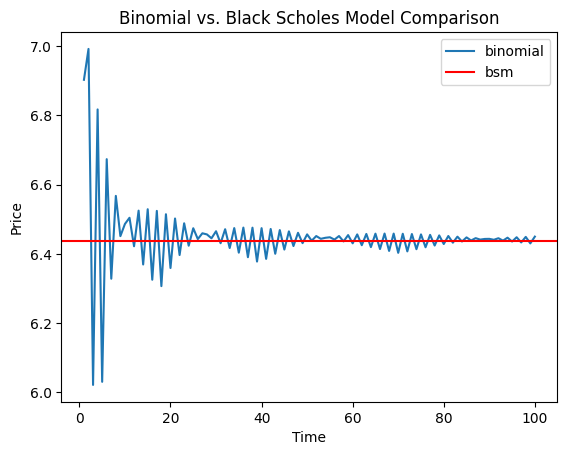

In [38]:
N = 100; K = 1.10*S0
c = np.zeros(N)
for n in range(1, N+1):
  c[n-1] = european_call(S0, K, rf, sigma, T, n)
plt.plot(np.arange(1,N+1), c, label = 'binomial');plt.title('Binomial vs. Black Scholes Model Comparison');plt.xlabel('Time');plt.ylabel('Price')
plt.axhline(y = bsm_call(S0, K, rf, sigma, T), label = 'bsm', color='red')
plt.legend()

### American Put Option

In [25]:
# generate full stock price tree
def gen_stock_tree(S0, sigma, T, n):
  dt = T / n
  u = np.exp(sigma*np.sqrt(dt)); d = 1/u
  S = np.zeros((n+1, n+1))
  S[0,0] = S0
  for j in range(0, n):
    S[:,j+1] = S[:,j] * u
    S[j+1,j+1] = S[j,j] * d
  return (u, d, S)

In [26]:
gen_stock_tree(S0, sigma, T, 4)

(1.1051709180756477,
 0.9048374180359595,
 array([[100.        , 110.51709181, 122.14027582, 134.98588076,
         149.18246976],
        [  0.        ,  90.4837418 , 100.        , 110.51709181,
         122.14027582],
        [  0.        ,   0.        ,  81.87307531,  90.4837418 ,
         100.        ],
        [  0.        ,   0.        ,   0.        ,  74.08182207,
          81.87307531],
        [  0.        ,   0.        ,   0.        ,   0.        ,
          67.0320046 ]]))

In [27]:
# American put tree
def american_put(S0, K, rf, sigma, T, n):
  u, d, S = gen_stock_tree(S0, sigma, T, n)
  dt = T / n
  q = (np.exp(rf*dt) - d) / (u - d)
  P = np.zeros((n+1, n+1))
  P[:, n] = np.clip(K - S[:,n], 0, None)
  for j in range(n-1, -1, -1):
    for i in range(j+1):
      P[i,j] = max(np.exp(-rf*dt)*(q * P[i,j+1] + (1-q)*P[i+1,j+1]),
                   K - S[i,j])
  return P[0,0]

In [28]:
american_put(S0, K, rf, sigma, T, 3)

11.417205016430339

Call Values at Expiration: [ 0.          0.          0.          5.68492269 13.72481651 22.74880058]


Text(0, 0.5, 'Dollars')

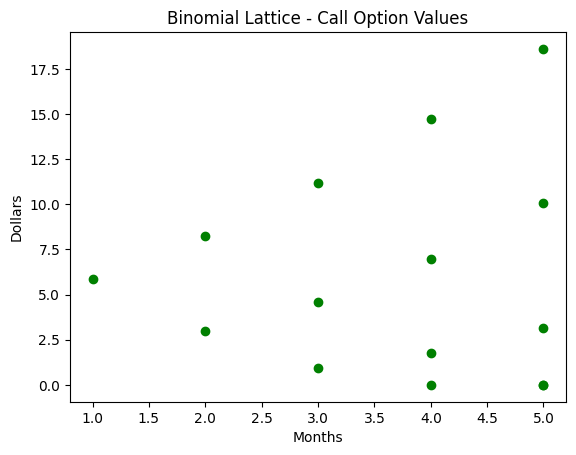

In [30]:
#Given Values
vol = .20
s0 = 62
t = 5/12
strike = 60
r = .10
R = (1+r/12)

#Calculate U, D, Q
u = np.exp(vol*np.sqrt(1/12))
d = 1/u
q = (np.exp(r*(1/12)) - d) / (u-d) 

sUUUUU = s0 * u**5
sUUUUD = s0 * u**4 * d
sUUUDD = s0 * u ** 3 * d**2
sUUDDD = s0 * u ** 2 * d **3
sUDDDD = s0 * u * d ** 4
sDDDDD = s0 * d ** 5

array_last_vals = np.array([sDDDDD, sUDDDD, sUUDDD,sUUUDD,sUUUUD,sUUUUU])


call_value = array_last_vals - strike #stock price - strike price
 
#Set all negative values = 0 
for i in range(len(call_value)):
    if call_value[[i]] < 0:
        call_value[i] = 0
    
print(f'Call Values at Expiration: {call_value}')


#Call Values
lc = []
for i in range(1,len(call_value)):
    lc.append((1/R) *(q*call_value[i] + (1-q)* call_value[i-1]))
lc

lc2 = []
for i in range(1,len(lc)):
    lc2.append(1/R *(q*lc[i] + (1-q)* lc[i-1]))
lc2

lc3 = []
for i in range(1,len(lc2)):
    lc3.append(1/R *(q*lc2[i] + (1-q)* lc2[i-1]))
lc3


lc4 = []
for i in range(1,len(lc3)):
    lc4.append(1/R *(q*lc3[i] + (1-q)* lc3[i-1]))
lc4

lc5 = []
for i in range(1,len(lc4)):
    lc5.append(1/R *(q*lc4[i] + (1-q)* lc4[i-1]))
lc5

x = [5,5,5,5,5]
x2 = [4,4,4,4]
x3 = [3,3,3]
x4 = [2,2]
x5 =[1]

plt.scatter(x,lc, color='green')
plt.scatter(x2,lc2, color='green')
plt.scatter(x3,lc3,color='green')
plt.scatter(x4,lc4,color='green')
plt.scatter(x5,lc5,color='green');plt.title('Binomial Lattice - Call Option Values');plt.xlabel('Months');plt.ylabel('Dollars')
